# 앙상블
- 여러개의 분류모델을 조합해서 더 나은 성능을 내는 방법

## RandomForest
: 의사결정트리 bagging(단일 모델 조합)해서 예측을 실행하는 모델

In [1]:
from sklearn import datasets

import numpy as np
np.random.seed(5)

In [2]:
# 손글씨 데이터
mnist = datasets.load_digits()
features, labels = mnist.data, mnist.target

In [3]:
mnist.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
len(mnist.data)

1797

In [18]:
# 의사결정 나무를 이용한 교차검증 10번 실시
from sklearn import tree
from sklearn.model_selection import cross_val_score

cv_scores = []
mtree = tree.DecisionTreeClassifier()
for i in range(10):
  cv_scores.append(cross_val_score(mtree, features, labels, cv=10, scoring="accuracy").mean())

cv_scores

[0.8252513966480446,
 0.8364090626939789,
 0.8246772191185598,
 0.8330602110490378,
 0.8202389819987586,
 0.8285971446306641,
 0.8224456859093732,
 0.8224332712600868,
 0.8319211669770329,
 0.8230198634388579]

In [19]:
np.mean(cv_scores)

0.8268054003724394

In [21]:
# randomforest를 이용한 교차검증 10번
from sklearn.ensemble import RandomForestClassifier
cv_scores = []
model_rf = RandomForestClassifier()
for i in range(10):
  cv_scores.append(cross_val_score(model_rf, features, labels, cv=10, scoring="accuracy").mean())

cv_scores

[0.9432402234636872,
 0.9454500310366232,
 0.9476784605834885,
 0.9521322160148975,
 0.9487833643699565,
 0.9443358162631904,
 0.9543699565487275,
 0.9521353196772191,
 0.9510117939168218,
 0.9482340161390439]

In [22]:
np.mean(cv_scores)

0.9487371198013654

In [23]:
def cross_validation(model, features, labels, n_cv):
  cv_scores = []
  for i in range(10):
    cv_scores.append(cross_val_score(model, features, labels, cv=n_cv, scoring="accuracy").mean())
  return cv_scores

In [25]:
# 의사결정나무
dt_cv_scores = cross_validation(tree.DecisionTreeClassifier() , features , labels, 10 )
dt_cv_scores

[0.8202327746741155,
 0.8363687150837988,
 0.8257976412166357,
 0.8297051520794538,
 0.8324612042209807,
 0.8291309745499689,
 0.83247982619491,
 0.8274612042209807,
 0.8258255741775296,
 0.8263469894475481]

In [26]:
# RandomForest
rf_cv_scores = cross_validation(RandomForestClassifier(), features , labels, 10 )
rf_cv_scores

[0.94768156424581,
 0.9482309124767225,
 0.9554872749844817,
 0.9465735567970205,
 0.951582867783985,
 0.9499037864680322,
 0.9493606455617629,
 0.9488019863438858,
 0.9449037864680323,
 0.9504593420235878]

### 랜덤포레스트와 의사결정나무 정확도의 시각화

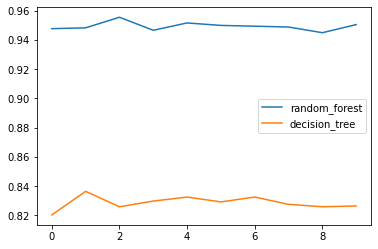

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

cv_list = {"random_forest":rf_cv_scores, "decision_tree":dt_cv_scores}
df = pd.DataFrame(cv_list)
df.plot()
plt.show()

---
# 보팅(voting) 앙상블 
: 단일 모델을 앙상블하여 더 나은 예측을 하는 모델 생성

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

### 단일 모델 정확도 측정

In [31]:
# 의사결정나무
dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)
dtree_score = dtree.score(X_test, y_test)
print("d-tree :", dtree_score)

d-tree : 0.8777777777777778


In [32]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train, y_train)
knn_score = knn.score(X_test, y_test)
print("knn :", knn_score)

knn : 0.9833333333333333


In [39]:
# SVM
from sklearn.svm import SVC
svm = SVC(probability=True).fit(X_train, y_train)
svm_score = svm.score(X_test, y_test)
print("SVM :", svm_score)

SVM : 0.9888888888888889


### 하드보팅
: 각각의 분류기의 예측값들을 모아, 가장 많은 득표를 받은 예측값으로 최종 결론을 내는 방식입니다.

In [36]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
  estimators=[("decision_tree", dtree), ("knn", knn), ("svm", svm)],
  weights=[1,1,1], # 투표 권한을 얼마의 비율로 줄것인지?
  voting="hard",
).fit(X_train, y_train)

voting_clf.score(X_test, y_test)

0.9833333333333333

### 소프트 보팅
: 각각의 분류모델을 활용하여 모든 분류값들의 확률들을 더해서 가장 높은 점수를 획득한 분류값으로 최종결론을 내는 방식입니다.

In [40]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
  estimators=[("decision_tree", dtree), ("knn", knn), ("svm", svm)],
  weights=[1,1,1], # 투표 권한을 얼마의 비율로 줄것인지?
  voting="soft",
).fit(X_train, y_train)

voting_clf.score(X_test, y_test)

0.9805555555555555